In [1]:
import os
import pandas as pd
import nimare as nm 

from nilearn.image import math_img
from nilearn.plotting import plot_stat_map

from nimare.correct import FWECorrector
from nimare.io import convert_sleuth_to_dataset
from nimare.meta.cbma import ALE, ALESubtraction
from nimare.tests.utils import get_test_data_path

In [3]:
#need_file = ('/Users/laurencegrenier/Desktop/Fasted-satieted_hunge in response to relevant stimuli - copie (1).txt')
need_file = ('/Users/laurencegrenier/Desktop/Fasted-satieted_hunge in response to relevant stimuli - copie (1) - copie.txt')

#want_file = ('/Users/laurencegrenier/Desktop/coordonnées désir-wants all (1).txt')
want_file = ('/Users/laurencegrenier/Desktop/coordonnées désir-wants all (1) - copie.txt')


In [4]:
need_set = convert_sleuth_to_dataset(need_file)
want_set = convert_sleuth_to_dataset(want_file)

In [5]:
import nimare
nimare.__version__

'0.0.10rc2'

INFO:nimare.correct:Using correction method implemented in Estimator: nimare.meta.cbma.ale.ALE.correct_fwe_montecarlo.


  0%|          | 0/100 [00:00<?, ?it/s]

INFO:nimare.meta.cbma.base:Using null distribution for voxel-level FWE correction.
INFO:nimare.correct:Using correction method implemented in Estimator: nimare.meta.cbma.ale.ALE.correct_fwe_montecarlo.


  0%|          | 0/100 [00:00<?, ?it/s]

INFO:nimare.meta.cbma.base:Using null distribution for voxel-level FWE correction.


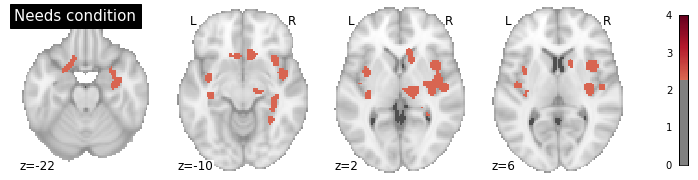

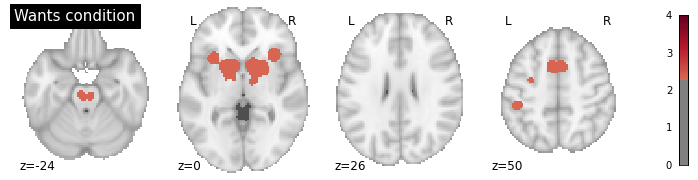

In [6]:
ale = ALE(null_method="approximate")
res = ale.fit(need_set)
res2 = ale.fit(want_set)

corr = FWECorrector(method="montecarlo", voxel_thresh=0.005, n_iters=100, n_cores=1)
cres = corr.transform(res)
cres2 = corr.transform(res2)

img = cres.get_map("z_level-cluster_corr-FWE_method-montecarlo")
plot_stat_map(
    img,
    cut_coords=4,
    display_mode="z",
    title="Needs condition",
    threshold=2.326,  # cluster-level p < .01, one-tailed
    cmap="RdBu_r",
    vmax=4,
)

img2 = cres2.get_map("z_level-cluster_corr-FWE_method-montecarlo")
plot_stat_map(
    img2,
    cut_coords=4,
    display_mode="z",
    title="Wants condition",
    threshold=2.326,  # cluster-level p < .01, one-tailed
    cmap="RdBu_r",
    vmax=4,
)

In [36]:
from nilearn import plotting
from nilearn.plotting import view_img
import matplotlib.pyplot as plt 
from nilearn.plotting.cm import _cmap_d as nilearn_cmaps


In [45]:
color = nilearn_cmaps['black_purple']

/Users/laurencegrenier/miniconda3/lib/python3.9/site-packages/nilearn/plotting/js_plotting_utils.py:85: UserWarning: choosing both vmin and a threshold is not allowed; setting vmin to 0
  warnings.warn('choosing both vmin and a threshold is not allowed; '
/Users/laurencegrenier/miniconda3/lib/python3.9/site-packages/nilearn/plotting/html_document.py:56: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  warnings.warn('It seems you have created more than {} '



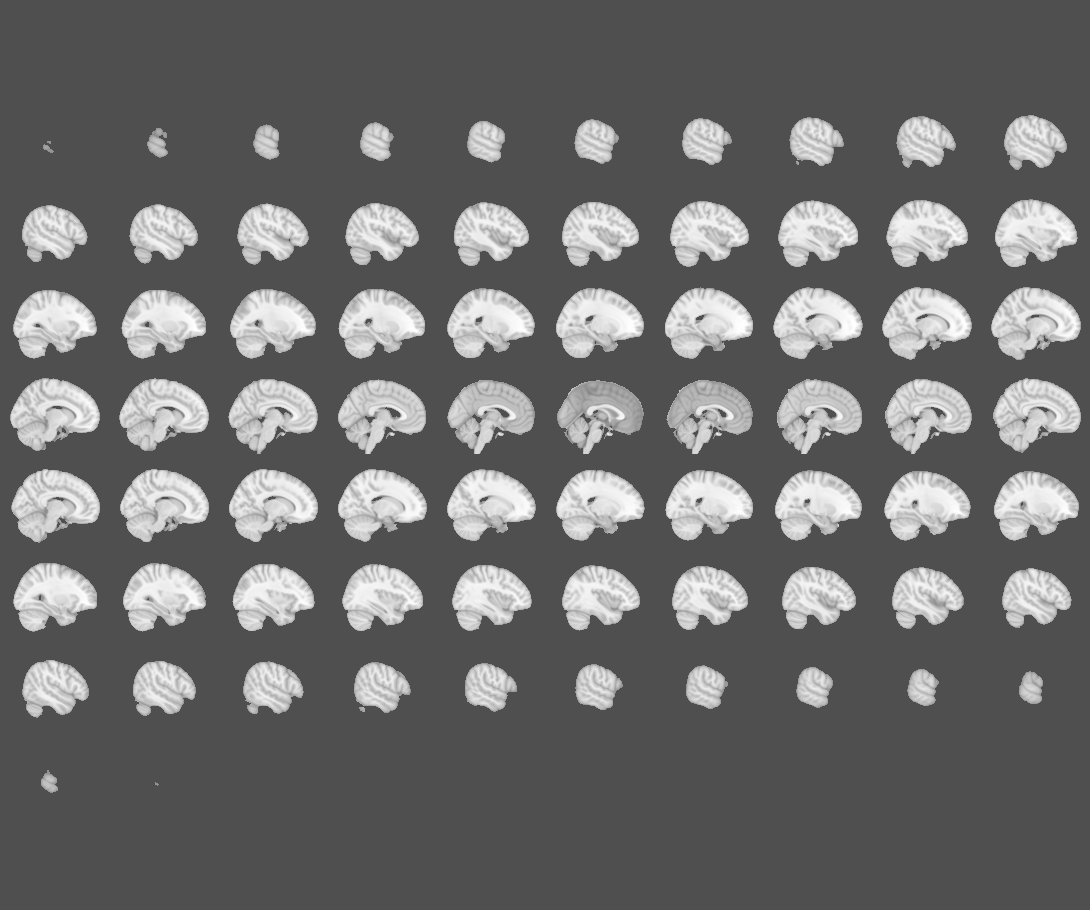
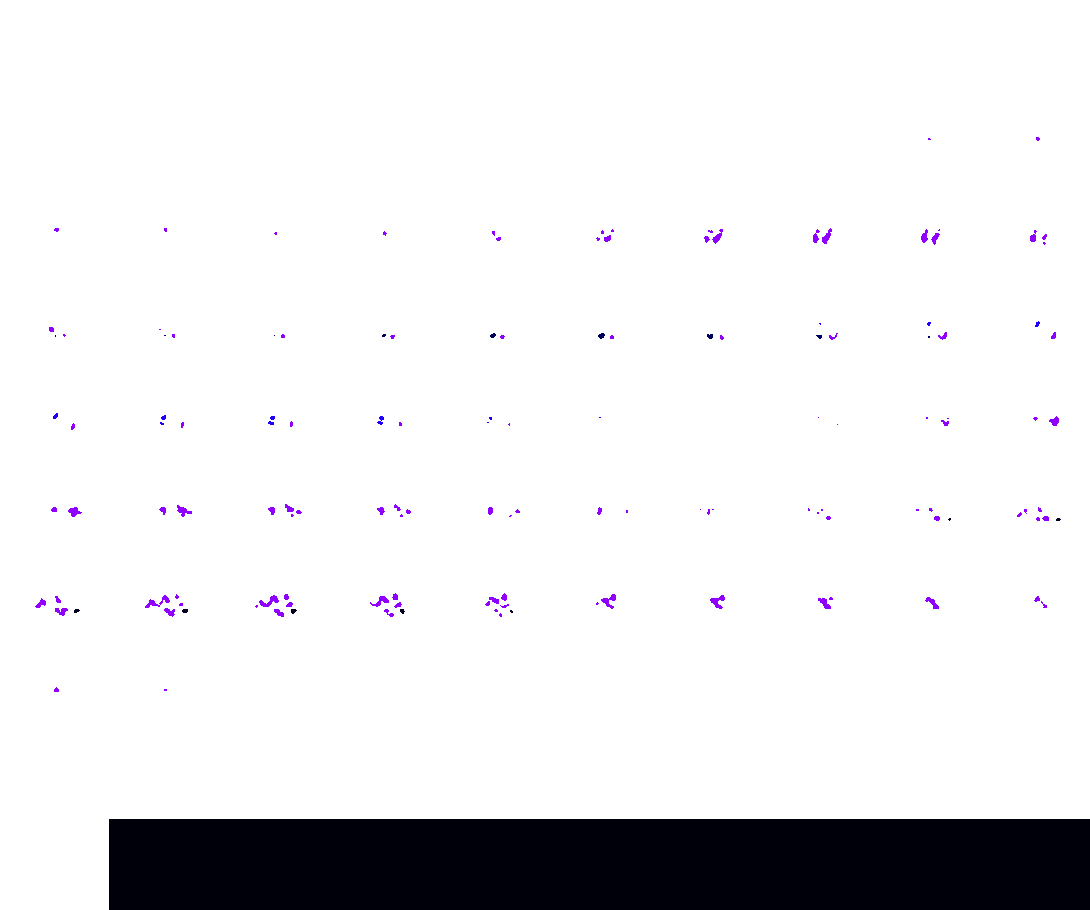

In [48]:
plotting.view_img(img, threshold="90%", cmap = color, black_bg = False, symmetric_cmap = False, vmin = 0, vmax = 4)

/Users/laurencegrenier/miniconda3/lib/python3.9/site-packages/nilearn/plotting/js_plotting_utils.py:85: UserWarning: choosing both vmin and a threshold is not allowed; setting vmin to 0
  warnings.warn('choosing both vmin and a threshold is not allowed; '
/Users/laurencegrenier/miniconda3/lib/python3.9/site-packages/nilearn/plotting/html_document.py:56: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  warnings.warn('It seems you have created more than {} '



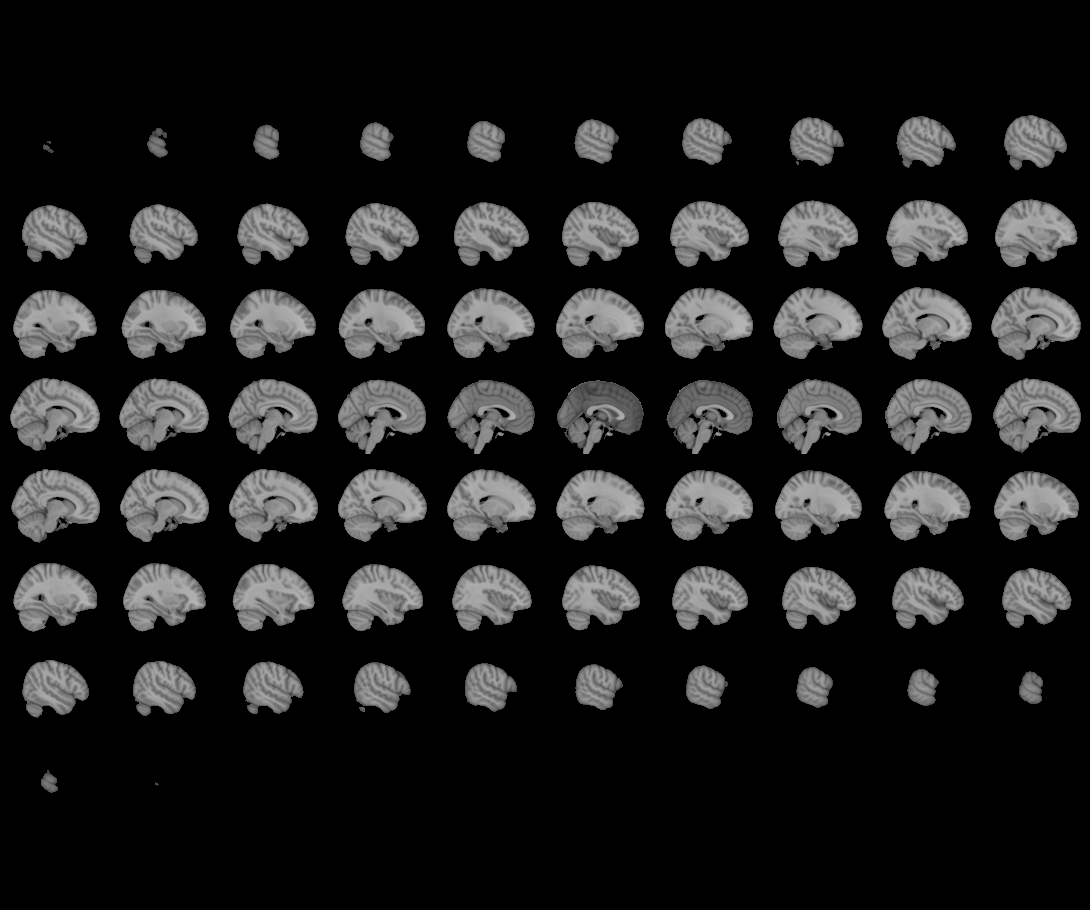
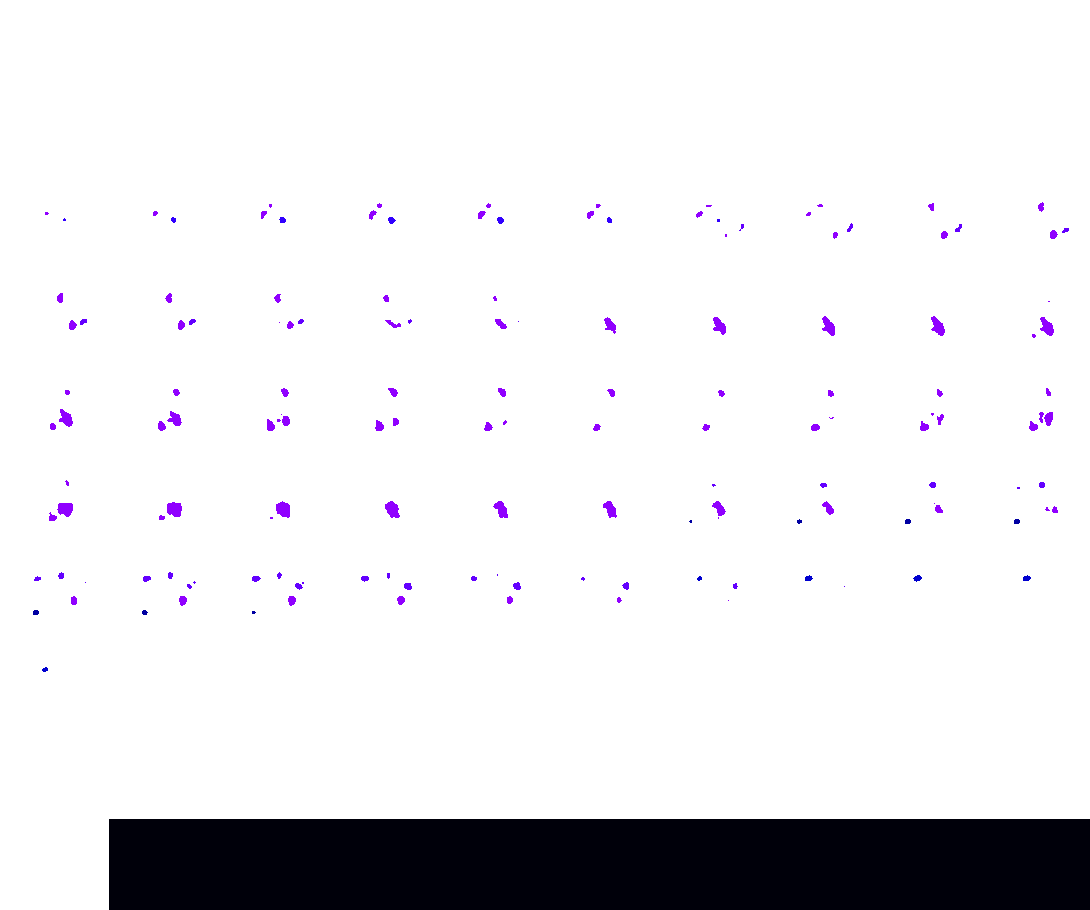

In [51]:
plotting.view_img(img2, cmap = color, threshold="90%", symmetric_cmap = False, vmin = 0, vmax = 4)

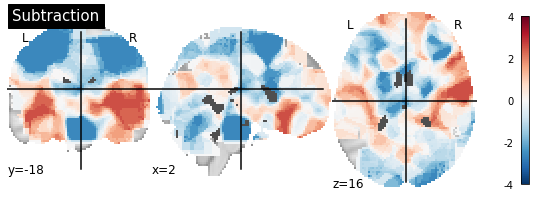

In [8]:
sub1 = ALESubtraction(n_iters=100, memory_limit=None)
res_sub1 = sub1.fit(need_set, want_set)
img_sub1 = res_sub1.get_map("z_desc-group1MinusGroup2")

plot_stat_map(
    img_sub1,
    #cut_coords=4,
    #display_mode="z",
    title="Subtraction",
    cmap="RdBu_r",
    vmax=4,
)

/Users/laurencegrenier/miniconda3/lib/python3.9/site-packages/nilearn/plotting/js_plotting_utils.py:76: UserWarning: you have specified symmetric_cmap=False but the map contains negative values; setting symmetric_cmap to True
  warnings.warn('you have specified symmetric_cmap=False '
/Users/laurencegrenier/miniconda3/lib/python3.9/site-packages/nilearn/plotting/html_document.py:56: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  warnings.warn('It seems you have created more than {} '



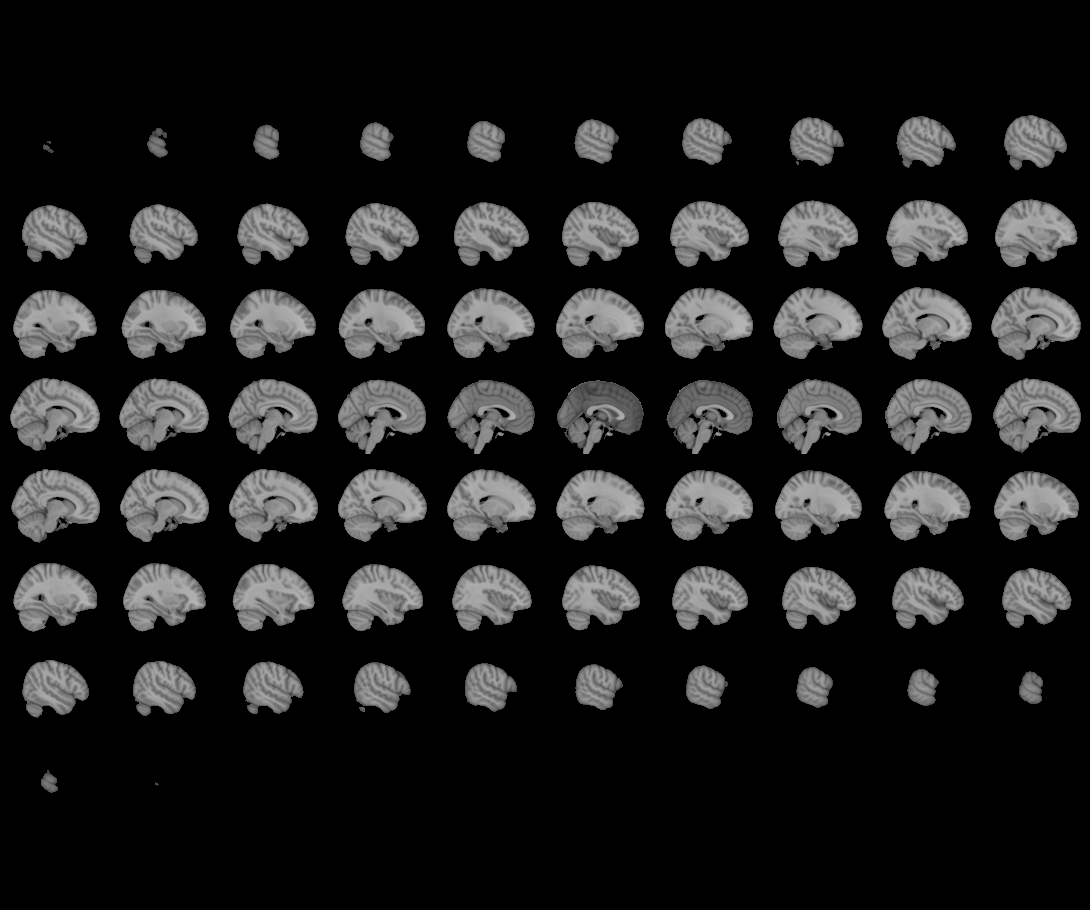
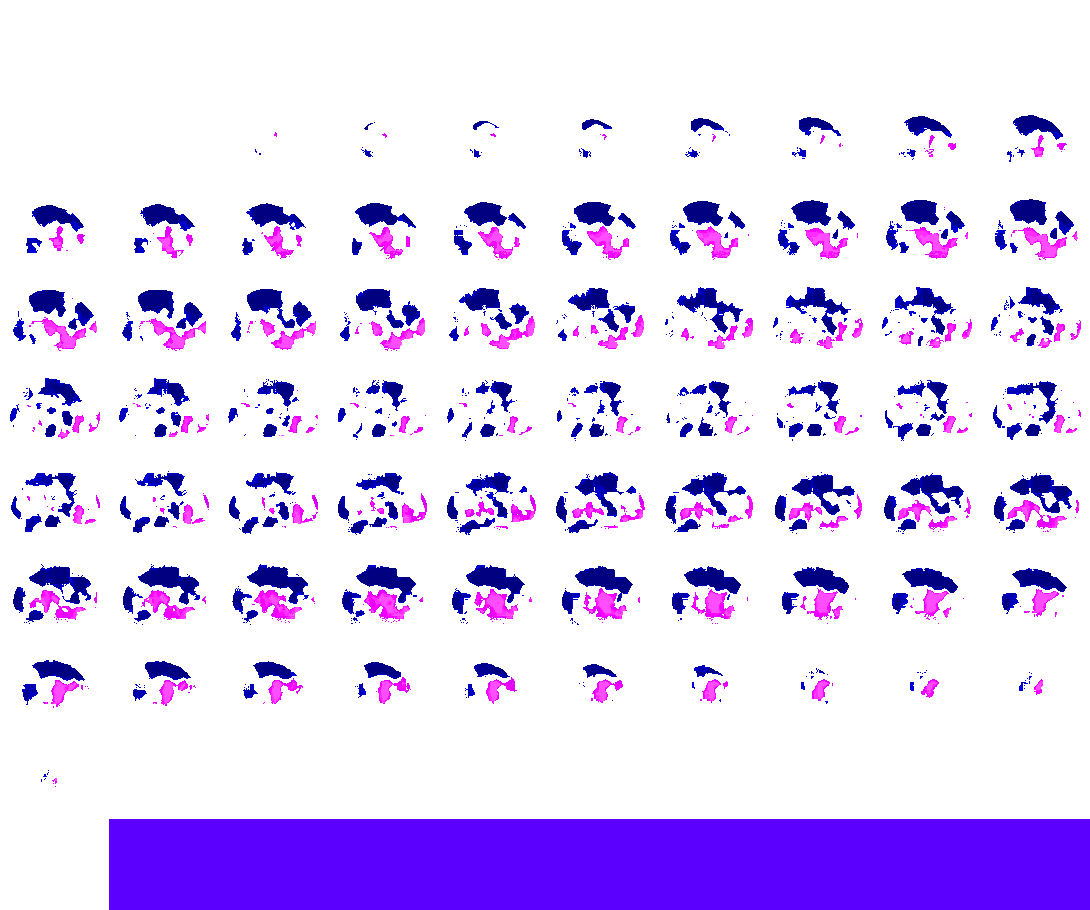

In [52]:
from nilearn import plotting
from nilearn.plotting import view_img

plotting.view_img(img_sub1, cmap = color, threshold="90%", symmetric_cmap = False, vmax = 4)

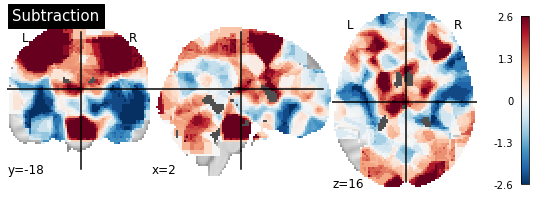

In [27]:
sub2 = ALESubtraction(n_iters=100, memory_limit=None)
res_sub2 = sub2.fit(want_set, need_set)
img_sub2 = res_sub2.get_map("z_desc-group1MinusGroup2")

plot_stat_map(
    img_sub2,
    #cut_coords=4,
    #display_mode="z",
    title="Subtraction",
    cmap="RdBu_r",
    #vmax=4,
)

/Users/laurencegrenier/miniconda3/lib/python3.9/site-packages/nilearn/plotting/js_plotting_utils.py:76: UserWarning: you have specified symmetric_cmap=False but the map contains negative values; setting symmetric_cmap to True
  warnings.warn('you have specified symmetric_cmap=False '
/Users/laurencegrenier/miniconda3/lib/python3.9/site-packages/nilearn/plotting/html_document.py:56: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  warnings.warn('It seems you have created more than {} '



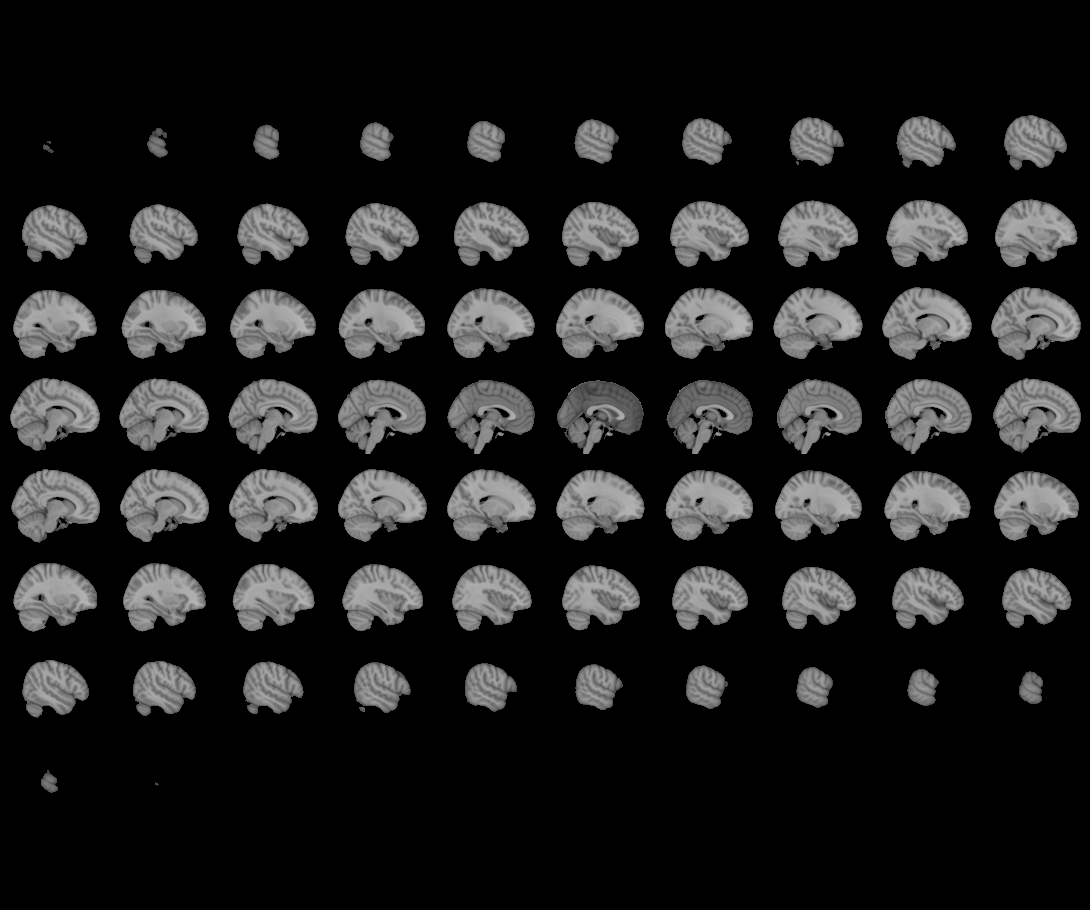
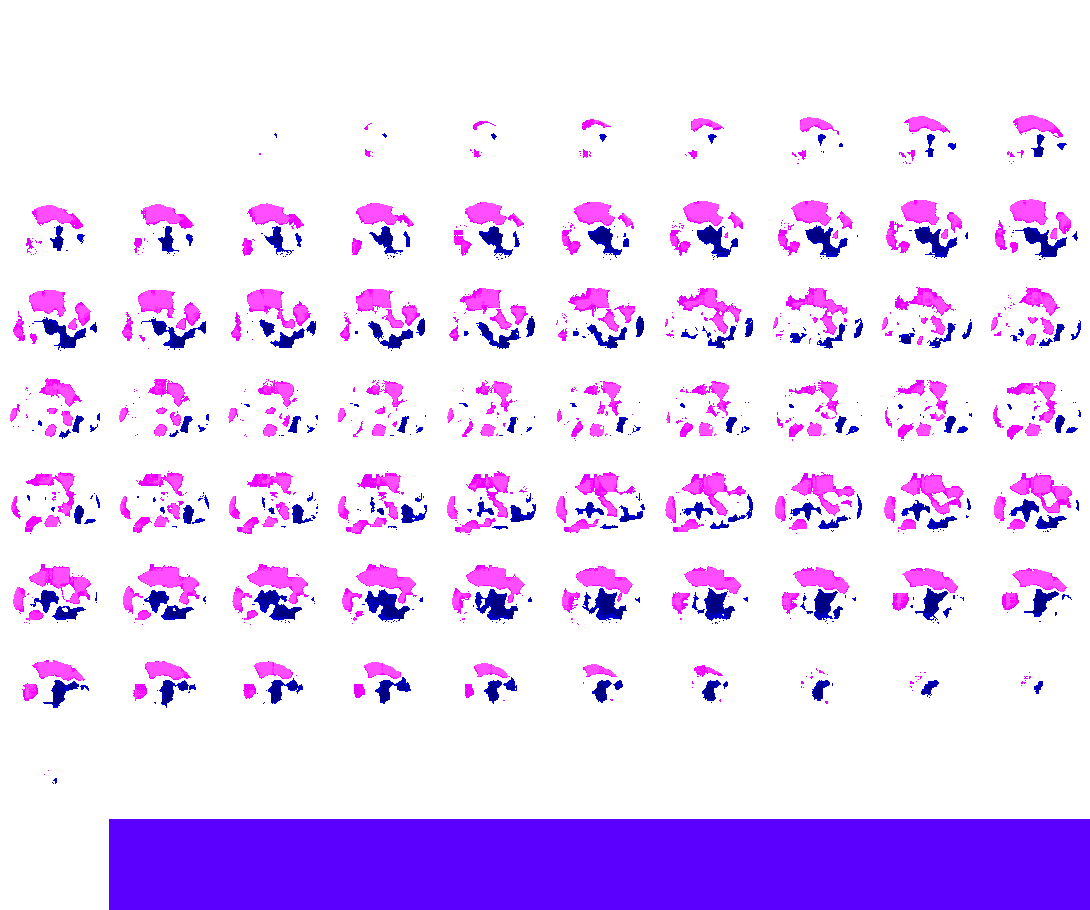

In [53]:
from nilearn import plotting
from nilearn.plotting import view_img

plotting.view_img(img_sub2, cmap = color, threshold="90%", symmetric_cmap = False, vmax = 4)

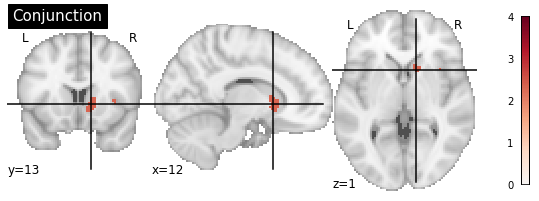

In [12]:
formula = "np.where(img * img2 > 0, np.minimum(img, img2), 0)"
img_conj = math_img(formula, img=img, img2=img2)

plot_stat_map(
    img_conj,
    #cut_coords=4,
    #display_mode="z",
    title="Conjunction",
    #threshold=2.326,  # cluster-level p < .01, one-tailed
    cmap="RdBu_r",
    vmax=4,
)

/Users/laurencegrenier/miniconda3/lib/python3.9/site-packages/nilearn/plotting/js_plotting_utils.py:85: UserWarning: choosing both vmin and a threshold is not allowed; setting vmin to 0
  warnings.warn('choosing both vmin and a threshold is not allowed; '
/Users/laurencegrenier/miniconda3/lib/python3.9/site-packages/nilearn/plotting/html_document.py:56: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  warnings.warn('It seems you have created more than {} '



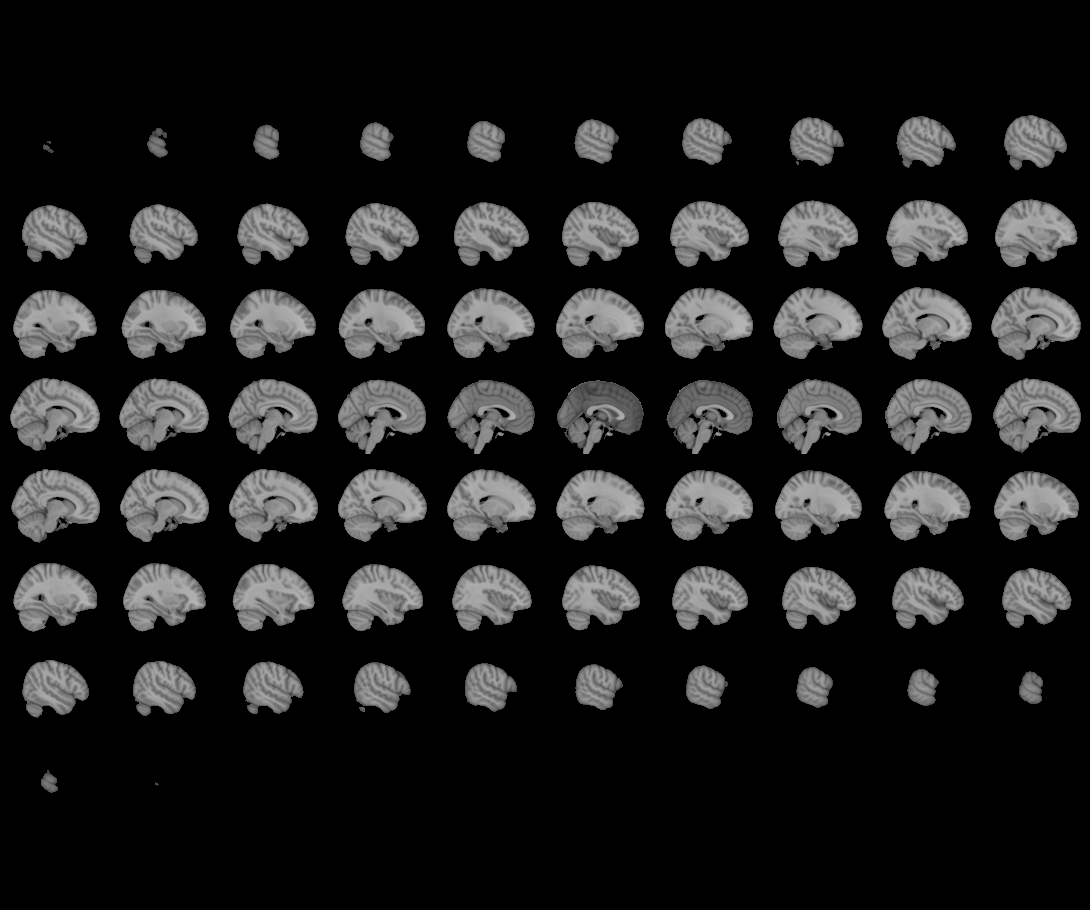
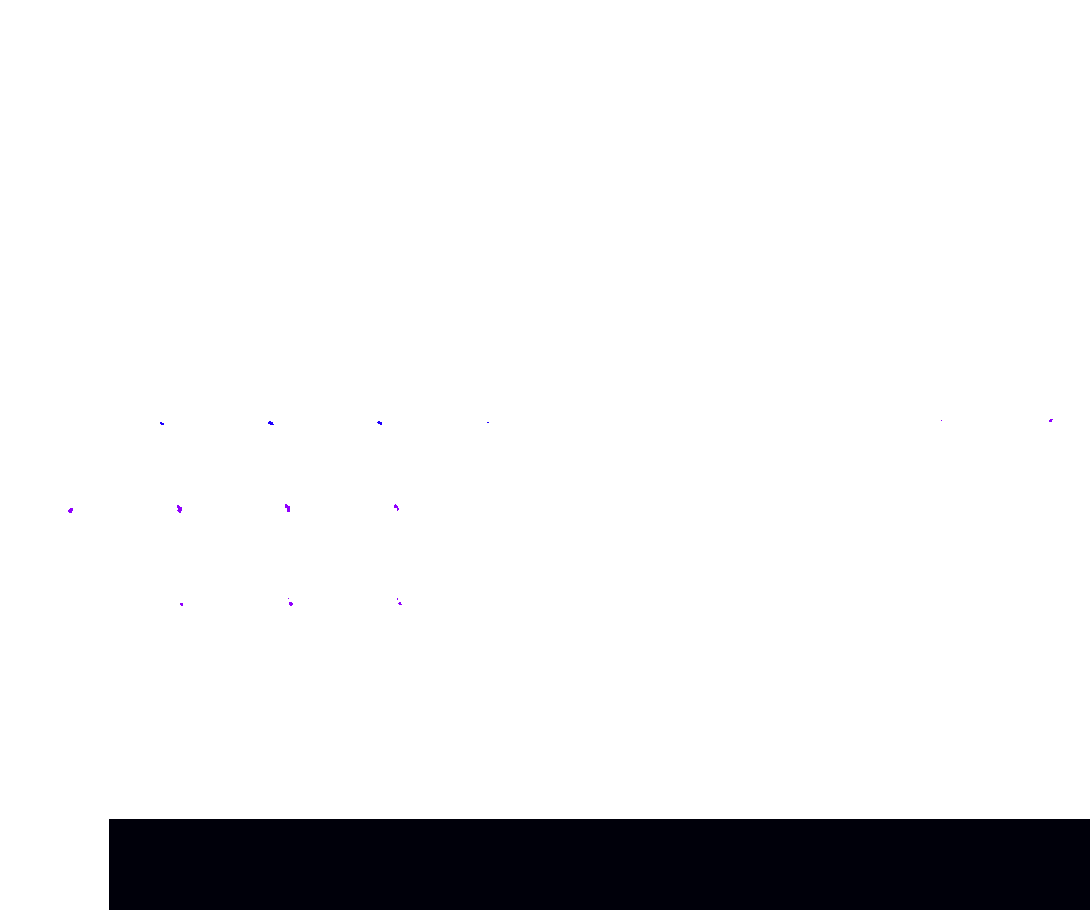

In [54]:
plotting.view_img(img_conj, threshold="90%", cmap = color, symmetric_cmap= False, vmin = 0, vmax = 4)

/Users/laurencegrenier/miniconda3/lib/python3.9/site-packages/nilearn/plotting/js_plotting_utils.py:85: UserWarning: choosing both vmin and a threshold is not allowed; setting vmin to 0
  warnings.warn('choosing both vmin and a threshold is not allowed; '
/Users/laurencegrenier/miniconda3/lib/python3.9/site-packages/nilearn/plotting/html_document.py:56: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  warnings.warn('It seems you have created more than {} '



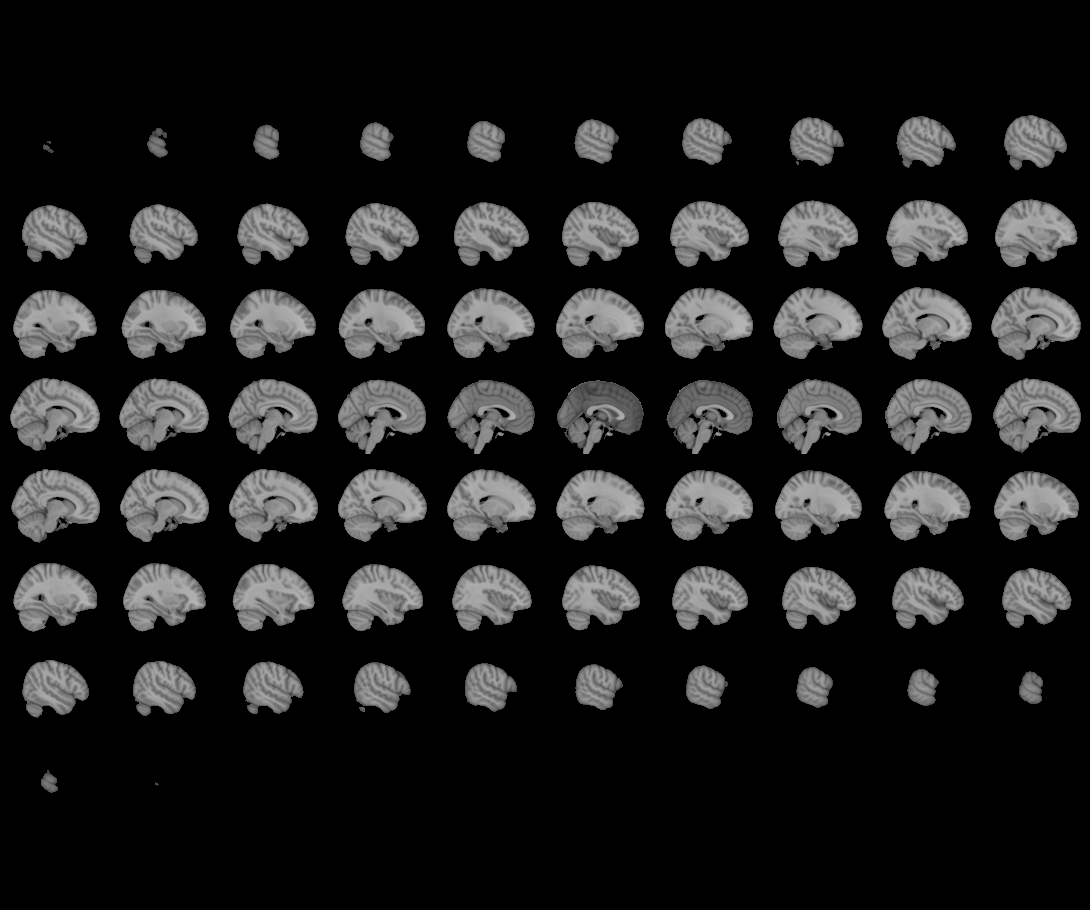
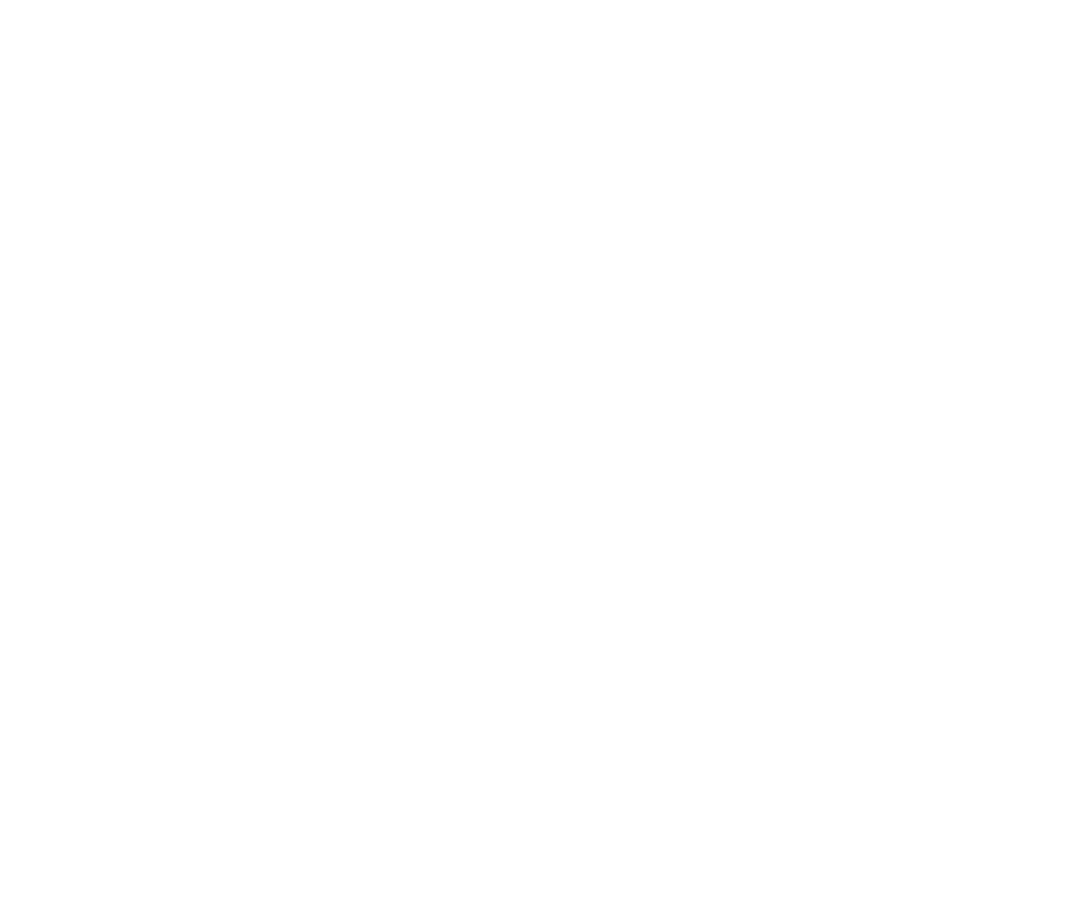

In [29]:
plotting.view_img(img_conj, threshold=2.326,symmetric_cmap= False, vmin = 0, resampling_interpolation = "nearest")
